In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# I import the file with data

flights = pd.read_csv("BOS_CUN_trips1M.csv",)

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


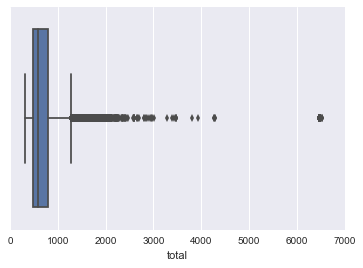

In [10]:
# I now want to quickly visualise the data using a box plot.

sns.boxplot(flights['total'], vert=False)

# I can now see the distribution. There is one outlier at ~$6,500.
# 75% of the tickets are below $1250.

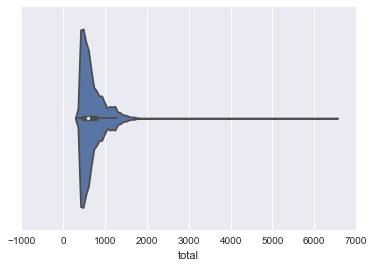

In [11]:
# I also want to plot a violin plot as I am not sure if the box plot  gives me the full picture.

sns.violinplot(flights['total'])

# I can now see that there are a lot of flights around ~$500.

In [6]:
# I am just interested in the total value.

flights_price = flights['total']
flights_price = pd.DataFrame(flights_price)
flights_price.describe()

,total
count,1.202445e+06
mean,6.742877e+02
std,2.787050e+02
min,3.203700e+02
25%,4.719500e+02
50%,5.913700e+02
75%,7.933700e+02
max,6.523740e+03


In [12]:
# This means that the mean price is ~$674, we will pay the minimum of $320.
# 50% of the flights cost $591 or less.
# The most expensive flight was at $6523.74

In [ ]:
'''There are a number of factors that will affect the price: 
the cabin class - I would expect the flights to be expensive for first class and cheapest for the economy class
the number of stopovers - I expect direct flights to be most expensive
refundable/non-refundable tickets - I would expect the latter to be cheaper
airline - some airlines will be more expensive than others
date booked - booking really far ahead and really close to the departure date should be expensive
travel time - some times will be cheaper than others'''